# Ayudantía 3: EDA

**Ayudante: Thomas Buddemberg**

**Mail: tbuddemberg@alumnos.uai.cl**

**Whatsapp: +569 7532 8800**

<h2>Descripción: </h2>
El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió tras chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y dio lugar a mejores normas de seguridad para los buques.

Una de las razones por las que el naufragio provocó tanta pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

**Lo que haremos será completar el análisis de qué tipo de personas es probable que sobrevivan.**

<img src=https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg>

In [1]:
import pandas as pd

In [2]:
import numpy as np

import seaborn as sns

#Renderizar graficos
import matplotlib.pyplot as plt

# Parametros de los graficos
from matplotlib import rcParams

# usar expresiones regulares
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Impresion directa en pantalla
%matplotlib inline

# Tamaño de graficos
rcParams['figure.figsize'] = 10,8

In [3]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
print(list(df_train.columns))
df_train.head(3)

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
print(list(df_test.columns))
df_test.head(3)

(418, 11)
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg>

In [5]:
total = len(df_train) + len(df_test)

print(f'Registros totales: {total} ')

train_porc = round(len(df_train) / total * 100, 3)
test_porc = round(len(df_test) / total * 100, 3)
print(f'Porcentaje que aporta train: {train_porc}\nPorcentaje que aporta test: {test_porc}')

Registros totales: 1309 
Porcentaje que aporta train: 68.067
Porcentaje que aporta test: 31.933


<h3>Diccionario de datos</h3><br>
Clave de definición de variable<br>
<b>survival</b> Supervivencia 0 = No, 1 = Sí<br>
<b>pclass</b> Clase de boleto 1 = 1, 2 = 2, 3 = 3 <br>
<b>sex</b> Sexo <br>
<b>Age</b> Edad en años <br>
<b>sibsp</b> # de hermanos/cónyuges a bordo del Titanic <br>
<b>parch</b> # de padres/hijos a bordo del Titanic <br>
<b>ticket</b> Número de billete <br>
<b>fare</b> Tarifa de pasajero <br>
<b>cabin</b> Número de cabina <br>
<b>embarked	</b>Puerto de embarque C = Cherburgo, Q = Queenstown, S = Southampton<br>

<h3>Notas de variables</h3><br>
<b>pclass: </b>Un proxy para el estado socioeconómico (SES)<br>
1º = Upper<br>
2do = Medio<br>
3ro = Lower<br>
<b>age: </b>Age es fraccionario si es menor que 1. Si se estima la edad, tiene la forma de xx.5<br>
<b>sibsp:</b> El conjunto de datos define las relaciones familiares de esta manera...<br>
- <b>Sibling </b>= hermano, hermana, hermanastro, hermanastra<br>
- <b>Spouse </b>= marido, mujer (se ignoraron amantes y novios)<br>

<b>parch: </b>El conjunto de datos define las relaciones familiares de esta manera...<br>
- <b>Parent</b> = madre, padre<br>
- <b>Child </b>= hija, hijo, hijastra, hijastro<br>

Algunos niños viajaron solo con una niñera, por lo tanto parch=0 para ellos.<br>

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Obtener el prefijo de todos los pasajeros
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


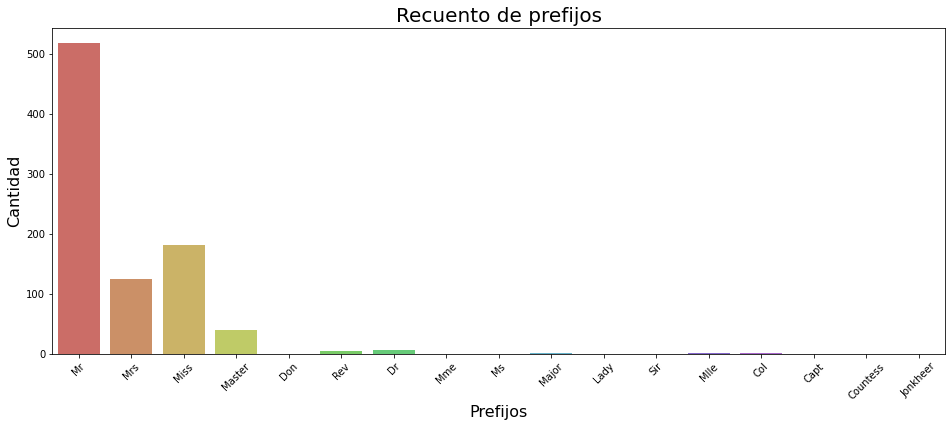

In [10]:
# Definimos el tamaño de la figura de nuestro gráfico
plt.figure(figsize=(16,6))

# Graficar resultado
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Prefijos", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.title("Recuento de prefijos", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [11]:
# Aplicamos lo mismo al test
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [12]:
# Agrupamos

Diccionario_títulos = {
        "Capt":       "Oficial",
        "Col":        "Oficial",
        "Major":      "Oficial",
        "Dr":         "Oficial",
        "Rev":        "Oficial",
        "Jonkheer":   "Realeza",
        "Don":        "Realeza",
        "Sir" :       "Realeza",
        "the Countess":"Realeza",
        "Dona":       "Realeza",
        "Lady" :      "Realeza",
        "Mme":        "Señora",
        "Ms":         "Señora",
        "Mrs" :       "Señora",
        "Mlle":       "Señorita",
        "Miss" :      "Señorita",
        "Mr" :        "Señor",
        "Master" :    "Maestro"
                   }
# Asignamos (map) cada título a la categoría correcta
df_train['Title'] = df_train.Title.map(Diccionario_títulos)
df_test['Title'] = df_test.Title.map(Diccionario_títulos)

In [13]:
print("Posibilidades de sobrevivir según los títulos: ") 
print(df_train.groupby("Title")["Survived"].mean())
print(f'\nMrs: Señora')

Posibilidades de sobrevivir según los títulos: 
Title
Maestro     0.575000
Oficial     0.277778
Realeza     0.500000
Señor       0.156673
Señora      0.795276
Señorita    0.701087
Name: Survived, dtype: float64

Mrs: Señora


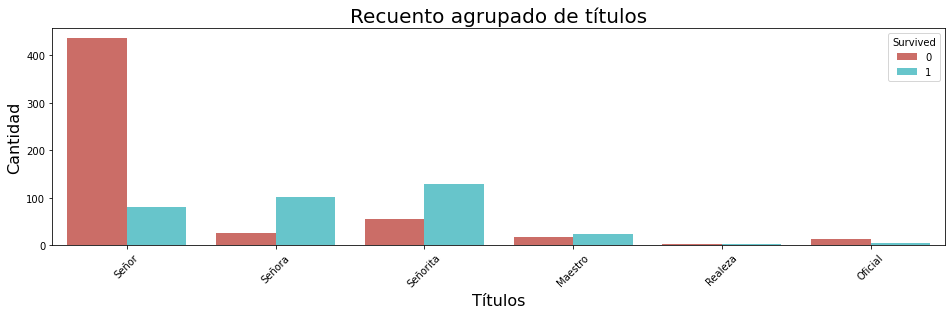

In [14]:
plt.figure(figsize=(16,5))

# Grafico del recuento de títulos por categoría Survived o not Survived
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Títulos", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.title("Recuento agrupado de títulos", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Primero miraré mi distribución sin NaNs
# Voy a crear un df para buscar distribucion

age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]

age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]

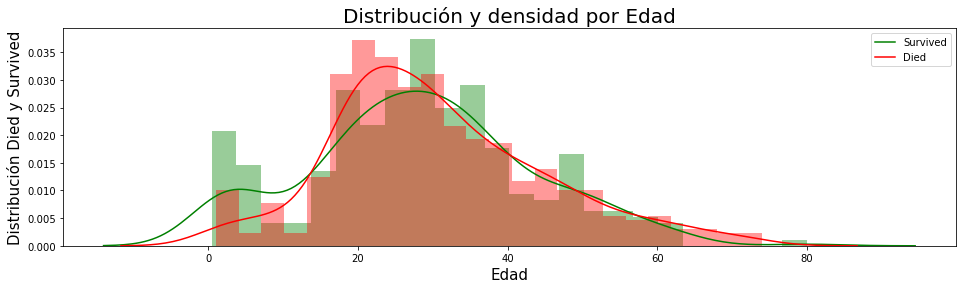

In [16]:
plt.figure(figsize=(16,5))
# Graficar las 2 variables que creamos y comparar las dos
sns.distplot(age_high_zero_surv["Age"], bins=24, color='g')
sns.distplot(age_high_zero_died["Age"], bins=24, color='r')
plt.legend(['Survived', 'Died'])
plt.title("Distribución y densidad por Edad",fontsize=20)
plt.xlabel("Edad",fontsize=15)
plt.ylabel("Distribución Died y Survived",fontsize=15)
plt.show()

In [17]:
# Agrupemos la edad media por sexo, clase y título
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title   
female  1       Oficial     49.0
                Realeza     48.0
                Señora      40.0
                Señorita    30.0
        2       Señora      31.5
                Señorita    24.0
        3       Señora      31.0
                Señorita    18.0
male    1       Maestro      4.0
                Oficial     51.0
                Realeza     40.0
                Señor       40.0
        2       Maestro      1.0
                Oficial     46.5
                Señor       31.0
        3       Maestro      4.0
                Señor       26.0
Name: Age, dtype: float64


In [18]:
df_train[df_train['Title']=='Maestro'].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Maestro
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Maestro
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,Maestro
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,Maestro
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Maestro
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Maestro
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Maestro
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,Maestro
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Maestro
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Maestro


In [19]:
# ingresando los valores NaN de Age
# usando groupby para transformar estas variables
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

# imprimiendo el total de valores nulos en la característica de edad
print(df_train["Age"].isnull().sum())

0


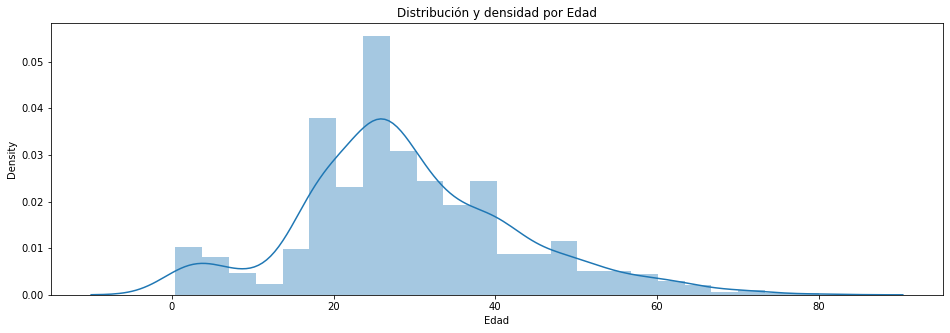

In [20]:
plt.figure(figsize=(16,5))

# grafiar nuevamente la distribución de edad después de la transformación en nuestro conjunto de datos
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribución y densidad por Edad")
plt.xlabel("Edad")
plt.show()

<Figure size 1152x360 with 0 Axes>

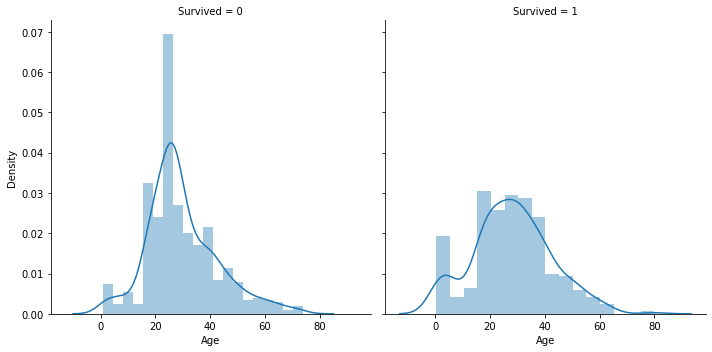

In [21]:
# separar por supervivientes o no supervivientes

plt.figure(figsize=(16,5))

g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

In [22]:
#creando los intervalos que necesitamos para cortar cada rango de edades
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

cuts = ['bebés', 'niños', 'adolescentes', 'estudiantes', 'jóvenes', 'adultos', 'mayores']

df_train["Age_cut"] = pd.cut(df_train.Age, interval, labels=cuts)

df_train["Age_cut"].head()

0    estudiantes
1        adultos
2        jóvenes
3        jóvenes
4        jóvenes
Name: Age_cut, dtype: category
Categories (7, object): ['bebés' < 'niños' < 'adolescentes' < 'estudiantes' < 'jóvenes' < 'adultos' < 'mayores']

In [23]:
interval = (0, 5, 12, 18, 25, 35, 60, 120)

cuts = ['bebés', 'niños', 'adolescentes', 'estudiantes', 'jóvenes', 'adultos', 'mayores']

df_test["Age_cut"] = pd.cut(df_test.Age, interval, labels=cuts)

In [24]:
print(pd.crosstab(df_train.Age_cut, df_train.Survived))

Survived        0   1
Age_cut              
bebés          15  33
niños          16   9
adolescentes   54  49
estudiantes   108  56
jóvenes       206  99
adultos       133  91
mayores        17   5


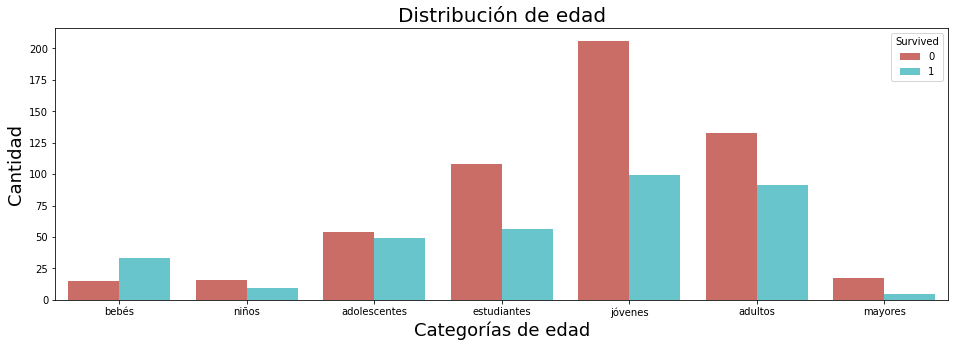

In [31]:
plt.figure(figsize=(16,5))

sns.countplot("Age_cut",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Cantidad", fontsize=18)
plt.xlabel("Categorías de edad", fontsize=18)
plt.title("Distribución de edad", fontsize=20)

plt.show()

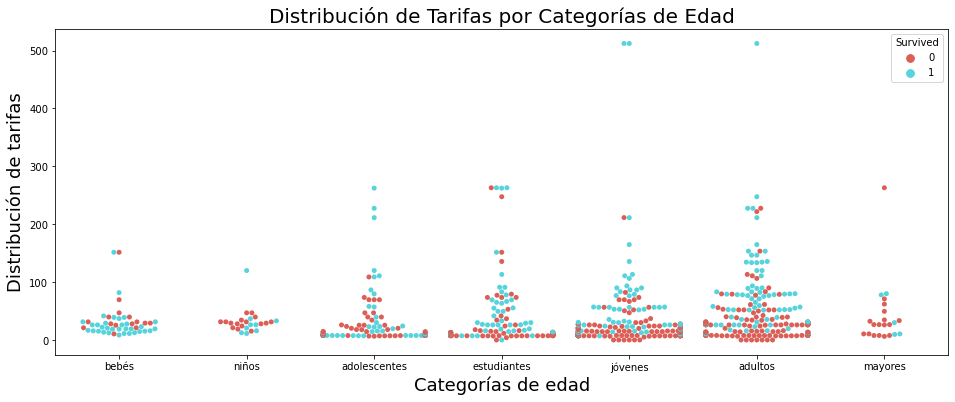

In [32]:
plt.figure(figsize=(16,6))
sns.swarmplot(x='Age_cut',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Distribución de tarifas", fontsize=18)
plt.xlabel("Categorías de edad", fontsize=18)
plt.title("Distribución de Tarifas por Categorías de Edad", fontsize=20)

plt.show()

In [26]:
Age_fare = ['Pclass', 'Age_cut']

cm = sns.light_palette("green", as_cmap=True)

pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

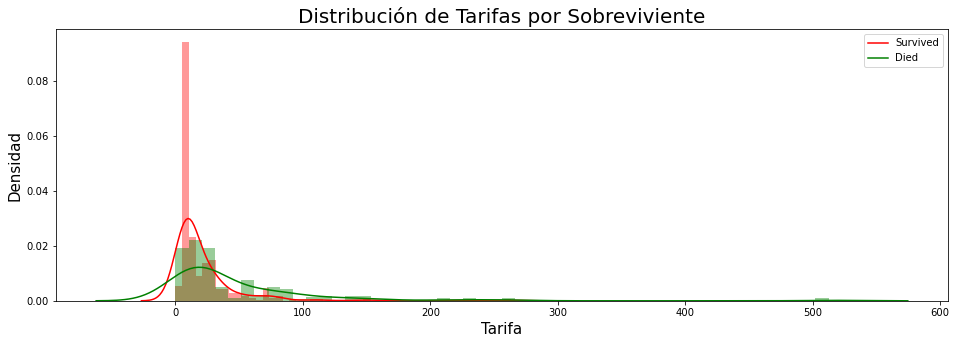

In [27]:
plt.figure(figsize=(16,5))

sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Distribución de Tarifas por Sobreviviente", fontsize=20)
plt.xlabel("Tarifa", fontsize=15)
plt.ylabel("Densidad",fontsize=15)
plt.legend(['Survived', 'Died'])
plt.show()

In [28]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64